In [1]:
import numpy as np
import plotly.graph_objects as go
from plotly.graph_objs import *
import os
import h5py
import glob
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
gen_pcds = np.load("../outputs/sample/vae_swd_logs_onchair/vae/samples.npy", allow_pickle=True)

# gen_pcds = np.load("../outputs/inference/vae_swd_logs_ep500/vae/reconstructions.npy", allow_pickle=True)
gen_pcds.shape

(1024, 2048, 3)

In [3]:
all_pcds = np.load("/home/junhal11/point-swd/dataset/shapenet_core55/shapenet57448xyzonly.npz", allow_pickle=True)["data"]
all_pcds.shape

(57448, 2048, 3)

In [4]:
def show_pcd(verts, ids=None, marker_size=1, pcdcolors=None):
    x, y, z = verts.T

    if pcdcolors is None:
        if ids is None:
            ids = np.linspace(0, 1, len(x), endpoint=True)
        go_pcd = go.Scatter3d(z=x, y=y, x=z,
                              # Intensity of each vertex, which will be interpolated and color-coded
                              mode='markers',
                              marker=dict(size=marker_size,
                                          color=ids,
                                          # set color to an array/list of desired values
                                          colorscale=[[0, 'gold'],
                                                      [0.5, 'mediumturquoise'],
                                                      [1, 'magenta']],   # choose a colorscale
                                         ))
    else:
        go_pcd = go.Scatter3d(z=x, y=y, x=z,
                              # Intensity of each vertex, which will be interpolated and color-coded
                              mode='markers',
                              marker=dict(size=marker_size,
                                          color=pcdcolors
                                         ))

    fig = go.Figure(data=[go_pcd])
    fig.show()


In [8]:
# 1258, 16010, 21000, 25000
pcd_ind = 10
show_pcd(gen_pcds[pcd_ind], marker_size=3)

In [4]:
lat_pcds = np.load("../outputs/inference/beta_vae_swd_logs_ep500/vae/latents.npy", allow_pickle=True)

pca = TSNE(n_components=2)
lat_pcds = pca.fit_transform(lat_pcds)

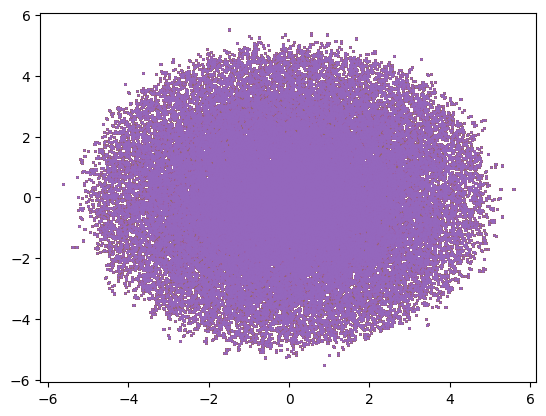

In [8]:
fig, ax = plt.subplots()
# len(lat_pcds)

size = len(lat_pcds) // 55
for i in range(55):
    start = i * size
    end = (i+1) * size
    ax.scatter(lat_pcds[:, 0], lat_pcds[:, 1], s=1)
plt.show()

In [23]:
len(lat_pcds) / 55

1044.509090909091